In [3]:
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
try:
    data_metadata = pd.read_table('metadata.tsv')
    data_high_density_lipids = pd.read_table('high_density_lipids.tsv')
    data_low_density_lipids = pd.read_table('low_density_lipids.tsv')
except:
    print('error_load_data')

In [5]:
data_metadata.head()

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,...,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
0,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,...,0.65,0.80,0.80,0.81,0.78,0.80,0.642500,1,1.0,NaN
1,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,...,1.03,0.92,1.03,1.03,1.03,1.09,0.840000,1,0.0,NaN
2,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,...,1.00,0.90,0.95,0.85,0.90,0.90,0.850000,3,1.0,Type 2 diabetes mellitus; MI - 2016
3,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,...,0.91,0.97,0.98,0.86,0.74,0.80,0.824167,2,0.0,1-2 times per year hypertensive crises (Corinfar)
4,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,...,1.20,1.20,1.25,1.10,1.30,1.13,1.098333,1,1.0,NaN


In [6]:
data_high_density_lipids.head()

,Vial.number,Patient.number,Name,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,...,G1,G2,G3,S0,S1,S2,S3,B,F,HM
0,1,50,HDL,0.38,1.78,0.14,0.05,0.73,2.90,1.57,...,12.23,58.69,20.97,2.87,29.57,44.39,15.06,0.05,7.35,2.49
1,3,52,HDL,0.43,1.30,0.23,0.05,0.59,2.62,1.62,...,11.98,57.50,21.94,2.92,29.60,43.93,14.97,0.05,8.71,1.53
2,4,53,HDL,0.41,3.86,0.31,0.10,0.96,3.19,2.42,...,15.00,62.10,12.74,4.20,37.03,40.68,7.93,0.10,4.81,5.08
3,5,54,HDL,0.50,1.79,0.23,0.06,0.77,2.96,1.76,...,12.85,56.02,22.70,3.32,30.01,41.78,16.46,0.06,8.85,2.30
4,6,55,HDL,0.40,3.69,0.17,0.03,0.80,3.04,1.62,...,13.81,59.78,16.14,3.02,33.69,42.18,10.84,0.03,7.25,4.33


In [7]:
data_low_density_lipids.head()

,Vial.number,Patient.number,Name,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,...,G1,G2,G3,S0,S1,S2,S3,B,F,HM
0,1,50,LDL,0.40,6.74,0.20,0.02,1.09,3.79,2.27,...,4.09,68.91,3.57,3.98,28.18,42.46,1.95,0.02,1.67,13.02
1,3,52,LDL,0.46,7.37,0.39,0.02,1.06,4.55,2.71,...,5.16,68.22,3.11,4.64,30.43,39.86,1.56,0.02,1.69,14.16
2,4,53,LDL,0.30,8.23,0.26,0.02,0.88,3.66,2.32,...,3.95,68.03,4.50,3.78,29.37,41.13,2.20,0.02,1.89,13.89
3,5,54,LDL,0.47,7.94,0.29,0.02,1.11,3.97,2.55,...,4.63,66.91,4.03,4.44,28.54,40.64,1.95,0.02,2.03,14.25
4,6,55,LDL,0.31,9.68,0.18,0.02,0.97,4.50,2.24,...,4.05,64.01,5.27,3.72,26.71,40.39,2.51,0.02,2.70,16.06


In [8]:
data_metadata.columns

Index(['Vialnumber', 'Patientnumber', 'Sucrose', 'Name', 'Group', 'Date',
       'Age', 'Plasmavolume', 'Ht', 'Wt', 'BMI', 'Sys', 'Dia', 'PR', 'Sm',
       'Dm', 'HT', 'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'Choi',
       'Tgi', 'HDLi', 'LDLi', 'Choi_exp', 'Tgi_exp', 'HDLi_exp', 'LDLi_exp',
       'AI', 'rlatmin', 'rantmin', 'rposmin', 'llatmin', 'lantmin', 'lposmin',
       'rlatmax', 'rantmax', 'rposmax', 'llatmax', 'lantmax', 'lposmax',
       'carotidIMTmean', 'Plaque', 'Statins', 'comorbidities'],
      dtype='object')

In [9]:
data_metadata['Patientnumber'].value_counts()

Patientnumber
38    2
37    2
40    2
39    2
43    2
42    2
50    1
51    1
57    1
56    1
58    1
59    1
54    1
55    1
52    1
53    1
62    1
63    1
60    1
61    1
41    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
44    1
25    1
26    1
27    1
Name: count, dtype: int64

In [10]:
data_metadata['Patientnumber'].unique()

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 37, 38, 39,
       40, 41, 42, 43, 30, 31, 32, 33, 34, 35, 36, 44, 25, 26, 27])

In [11]:
data_metadata['Patientnumber'].count()

np.int64(38)

In [12]:
data_metadata['Name'].unique()

array(['Begaye, Decarlo', 'Sweetwater, Kristen', 'Figurelli, Samuel',
       'Pamphille, Mehgan', 'Morgan, Rollin', 'Abdul-Amin, Taelor',
       "el-Reza, Mu'mina", 'Callahan, Govanni', 'Parker, Zhjade',
       'Ficklin, Madyson', 'Headlee, Kristopher', 'Araujo, Nicole',
       'Pelayo, Katelyn', 'Running-Rabbit, Scheridan', 'Vigil, Rene',
       'Mascarenas, Anthony', 'el-Kamal, Shaamil', 'Drager, Rachel',
       'el-Rasul, Faaid', 'Martinez, Nova', 'Aguilar, Dominique',
       'Rastle, Kathy', 'Craddock, Kadijah', 'Ng, Christian',
       'Padilla, Joshua', 'Truong, Minh', 'Blackmer, David',
       'Garcia, Alexa', 'Gurung, Gavriel', 'Olson, Sheldon',
       'Potter, Taylor', 'Thompson, Ben', 'Turnage, Tonaira',
       'Kim, Mathew', 'Lynn, Amber', 'Rizzolo, Tanner', 'Gonzalez, Joy',
       'Smith, Bayleigh'], dtype=object)

In [13]:
data_metadata['Group'].unique()

array([0, 1])

# Пациенты разбиты на две группы (0,1).
# персональные данные 'Name','Age'
# Date дата забора
# Vialnumber идентификатор образца
# Patientnumber идентификатор пациента
# Sucrose сахароза (0,1)
# 'Ht', 'Wt', 'BMI', 'Sys', 'Dia', 'PR', 'Sm', 'Dm', 'HT', 'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'Choi', 'Tgi', 'HDLi', 'LDLi', 'Choi_exp', 'Tgi_exp', 'HDLi_exp', 'LDLi_exp','AI','rlatmin', 'rantmin', 'rposmin', 'llatmin', 'lantmin', 'lposmin','rlatmax', 'rantmax', 'rposmax', 'llatmax', 'lantmax', 'lposmax', 'carotidIMTmean', 'Plaque' - показатели анализов, данных узи, антропоментрические данные
# Statins статины
# comorbidities коморбидная патология

In [14]:
data_high_density_lipids.columns

Index(['Vial.number', 'Patient.number', 'Name', 'GPHDL1', 'GPHDL2', 'GPHDL3',
       'GPHDL4', 'GPHDL5', 'GPHDL6', 'GPHDL7', 'GPHDL8', 'GPHDL9', 'GPHDL10',
       'GPHDL11', 'GPHDL12', 'GPHDL13', 'GPHDL14', 'GPHDL15', 'GPHDL16',
       'GPHDL17', 'GPHDL18', 'GPHDL19', 'GPHDL20', 'GPHDL21', 'GPHDL22',
       'sum_auc', 'LB', 'HB', 'G1', 'G2', 'G3', 'S0', 'S1', 'S2', 'S3', 'B',
       'F', 'HM'],
      dtype='object')

In [15]:
data_low_density_lipids.columns

Index(['Vial.number', 'Patient.number', 'Name', 'GPLDL1', 'GPLDL2', 'GPLDL3',
       'GPLDL4', 'GPLDL5', 'GPLDL6', 'GPLDL7', 'GPLDL8', 'GPLDL9', 'GPLDL10',
       'GPLDL11', 'GPLDL12', 'GPLDL13', 'GPLDL14', 'GPLDL15', 'GPLDL16',
       'GPLDL17', 'GPLDL18', 'GPLDL19', 'GPLDL20', 'GPLDL21', 'GPLDL22',
       'sum_auc', 'LB', 'HB', 'G1', 'G2', 'G3', 'S0', 'S1', 'S2', 'S3', 'B',
       'F', 'HM'],
      dtype='object')

In [16]:
data_high_density_lipids['Name'].unique()

array(['HDL'], dtype=object)

In [17]:
data_low_density_lipids['Name'].unique()

array(['LDL'], dtype=object)

# в колонке Name два значения HDL и LDL - способ анонимизировать данные, альтернативный вариант хэш функция

# GPLDL1', 'GPLDL2', 'GPLDL3', 'GPLDL4', 'GPLDL5', 'GPLDL6', 'GPLDL7', 'GPLDL8', 'GPLDL9', 'GPLDL10', 'GPLDL11', 'GPLDL12', 'GPLDL13', 'GPLDL14', 'GPLDL15', 'GPLDL16', 'GPLDL17', 'GPLDL18', 'GPLDL19', 'GPLDL20', 'GPLDL21', 'GPLDL22', 'sum_auc', 'LB', 'HB', 'G1', 'G2', 'G3', 'S0', 'S1', 'S2', 'S3', 'B','F', 'HM' - маркеры

# вероятно это обсервационное исследование
# две группы high_density_lipids и low_density_lipids


# Age возраст int 
# BMI индекс массы теда int
# Statins статины bool
# 'Sm', 'Dm', 'HT', 'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D' - bool

In [18]:
data_metadata.head()

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,...,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
0,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,...,0.65,0.80,0.80,0.81,0.78,0.80,0.642500,1,1.0,NaN
1,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,...,1.03,0.92,1.03,1.03,1.03,1.09,0.840000,1,0.0,NaN
2,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,...,1.00,0.90,0.95,0.85,0.90,0.90,0.850000,3,1.0,Type 2 diabetes mellitus; MI - 2016
3,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,...,0.91,0.97,0.98,0.86,0.74,0.80,0.824167,2,0.0,1-2 times per year hypertensive crises (Corinfar)
4,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,...,1.20,1.20,1.25,1.10,1.30,1.13,1.098333,1,1.0,NaN


# эмпирические гипоты
* влияние приема статинов на уровень ЛПНП и ЛПВП
* влияние уровня липопротеинов на риск развития сердечно-сосудистых заболеваний
* влияние уровня липопротеинов на степень выраженности атеросклероза брахиоцефальных артерий

# 2

# Гистограммы распределения значений переменных и вид распределения.

In [19]:
data_metadata.head()

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,...,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
0,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,...,0.65,0.80,0.80,0.81,0.78,0.80,0.642500,1,1.0,NaN
1,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,...,1.03,0.92,1.03,1.03,1.03,1.09,0.840000,1,0.0,NaN
2,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,...,1.00,0.90,0.95,0.85,0.90,0.90,0.850000,3,1.0,Type 2 diabetes mellitus; MI - 2016
3,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,...,0.91,0.97,0.98,0.86,0.74,0.80,0.824167,2,0.0,1-2 times per year hypertensive crises (Corinfar)
4,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,...,1.20,1.20,1.25,1.10,1.30,1.13,1.098333,1,1.0,NaN


In [20]:
def normal_distribution(data):
    stat, p = sc.stats.shapiro(data) # тест Шапиро-Уилк
    print('тест Шапиро-Уилк: Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')
        sns.histplot(data=data,kde=True,)
        plt.show();
        columns_not_norm.append(data.name)
    """stat, p = sc.stats.normaltest(data) # Критерий согласия Пирсона (n ≥ 100)
    print('Критерий согласия Пирсона: Statistics=%.3f, p-value=%.3f' % (stat, p))

    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')
    """
    

In [21]:
columns_not_norm = []

тест Шапиро-Уилк: Statistics=0.931, p-value=0.021
Отклонить гипотезу о нормальности


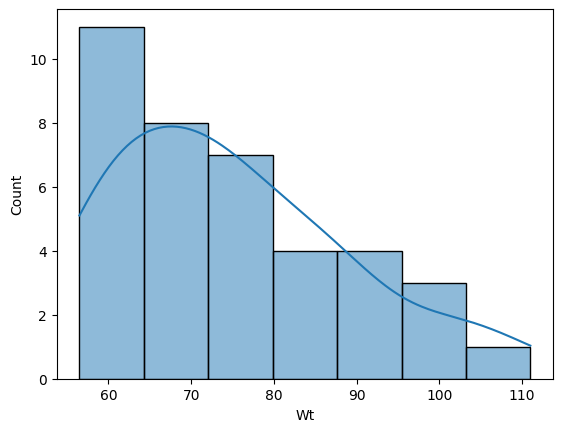

In [22]:
normal_distribution(data_metadata['Wt'])

In [23]:
def stat_columns(data):
    for column in data.columns[2:]:
        if (data[column].dtype == 'float64') or (data[column].dtype == 'int64'):
            print('-'*35)
            print(f'Признак: {column}')
            normal_distribution(data[column])
        


-----------------------------------
Признак: Sucrose
тест Шапиро-Уилк: Statistics=0.612, p-value=0.000
Отклонить гипотезу о нормальности


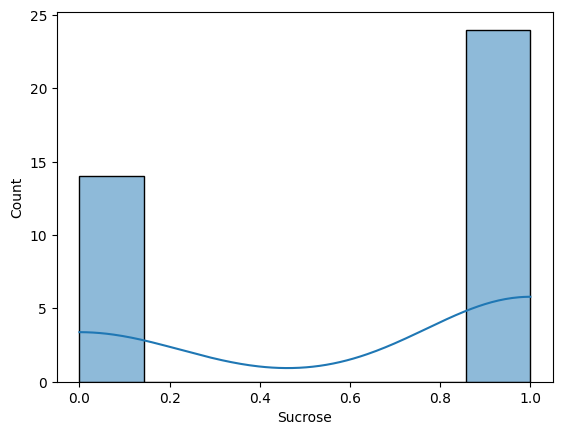

-----------------------------------
Признак: Group
тест Шапиро-Уилк: Statistics=0.612, p-value=0.000
Отклонить гипотезу о нормальности


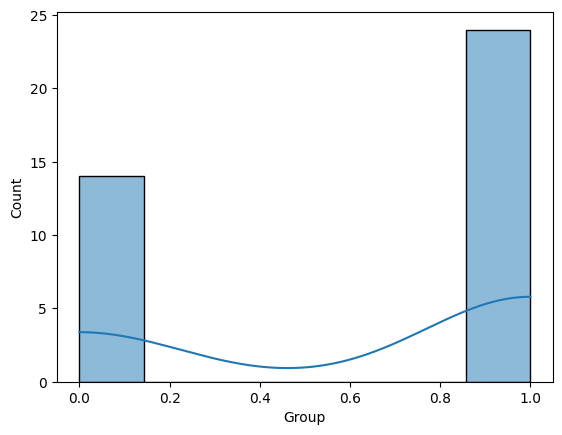

-----------------------------------
Признак: Age
тест Шапиро-Уилк: Statistics=0.983, p-value=0.836
Принять гипотезу о нормальности
-----------------------------------
Признак: Plasmavolume
тест Шапиро-Уилк: Statistics=0.866, p-value=0.000
Отклонить гипотезу о нормальности


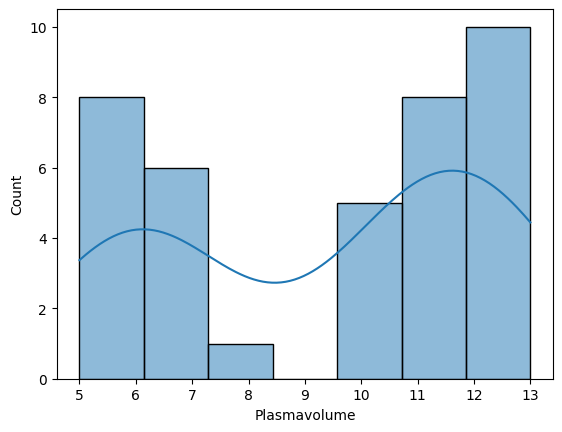

-----------------------------------
Признак: Ht
тест Шапиро-Уилк: Statistics=0.976, p-value=0.580
Принять гипотезу о нормальности
-----------------------------------
Признак: Wt
тест Шапиро-Уилк: Statistics=0.931, p-value=0.021
Отклонить гипотезу о нормальности


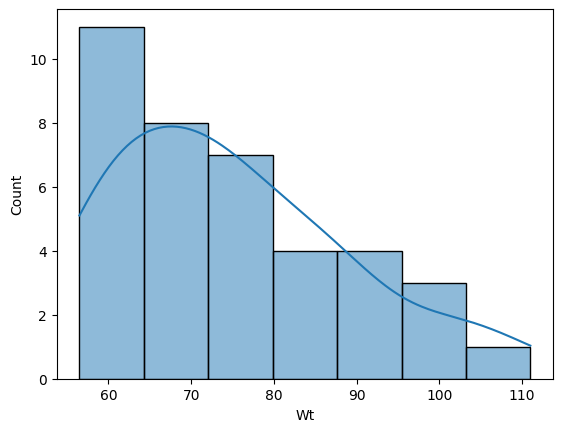

-----------------------------------
Признак: BMI
тест Шапиро-Уилк: Statistics=0.933, p-value=0.025
Отклонить гипотезу о нормальности


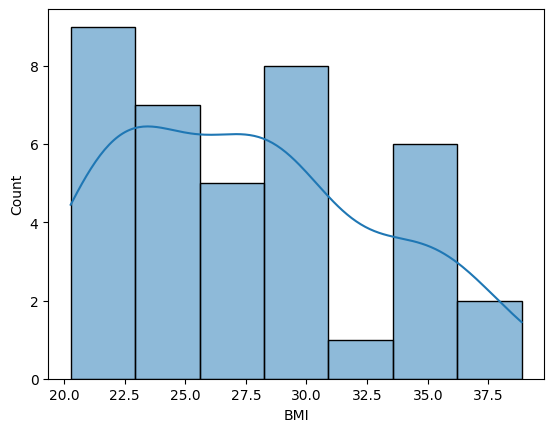

-----------------------------------
Признак: Sys
тест Шапиро-Уилк: Statistics=0.926, p-value=0.016
Отклонить гипотезу о нормальности


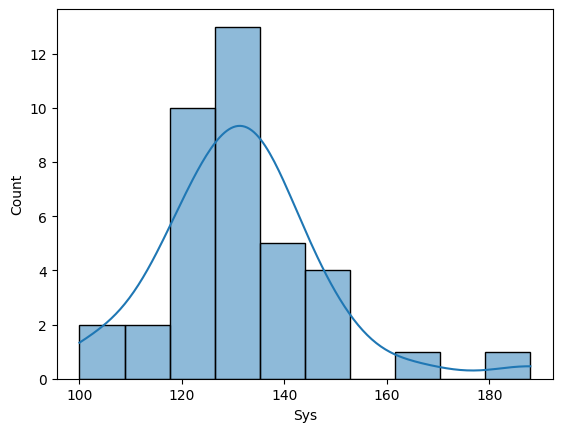

-----------------------------------
Признак: Dia
тест Шапиро-Уилк: Statistics=0.986, p-value=0.900
Принять гипотезу о нормальности
-----------------------------------
Признак: PR
тест Шапиро-Уилк: Statistics=0.964, p-value=0.263
Принять гипотезу о нормальности
-----------------------------------
Признак: Sm
тест Шапиро-Уилк: Statistics=0.302, p-value=0.000
Отклонить гипотезу о нормальности


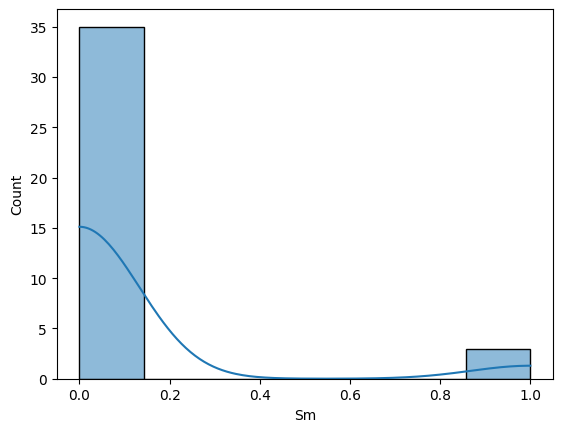

-----------------------------------
Признак: Dm
тест Шапиро-Уилк: Statistics=0.355, p-value=0.000
Отклонить гипотезу о нормальности


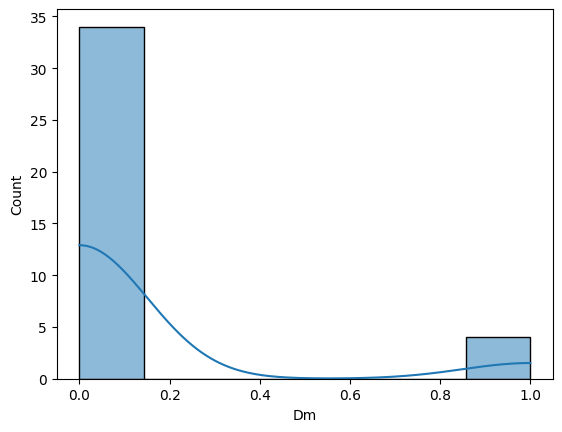

-----------------------------------
Признак: HT
тест Шапиро-Уилк: Statistics=0.621, p-value=0.000
Отклонить гипотезу о нормальности


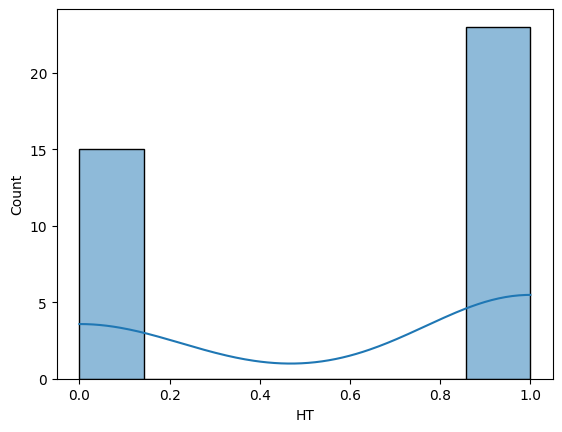

-----------------------------------
Признак: LVH
тест Шапиро-Уилк: Statistics=0.612, p-value=0.000
Отклонить гипотезу о нормальности


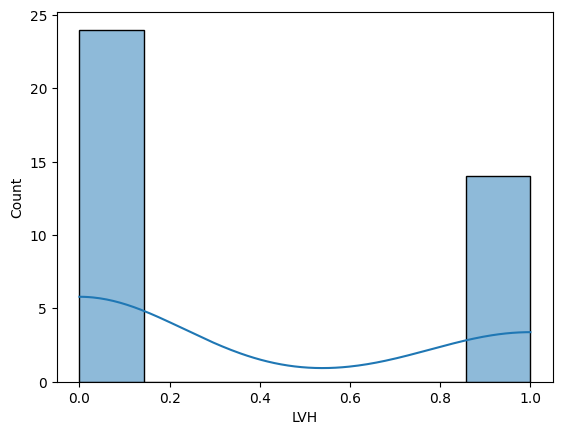

-----------------------------------
Признак: IHD
тест Шапиро-Уилк: Statistics=0.637, p-value=0.000
Отклонить гипотезу о нормальности


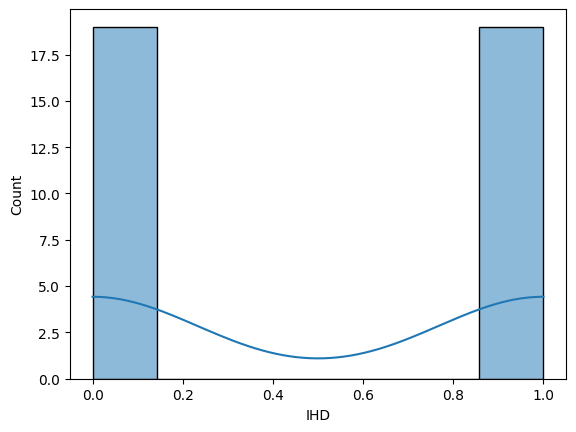

-----------------------------------
Признак: MI
тест Шапиро-Уилк: Statistics=0.355, p-value=0.000
Отклонить гипотезу о нормальности


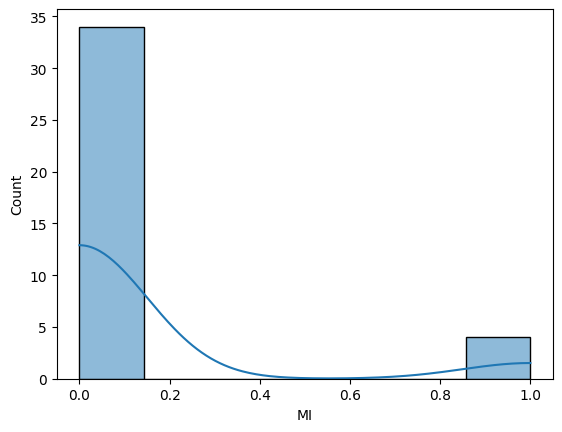

-----------------------------------
Признак: Str
тест Шапиро-Уилк: Statistics=0.237, p-value=0.000
Отклонить гипотезу о нормальности


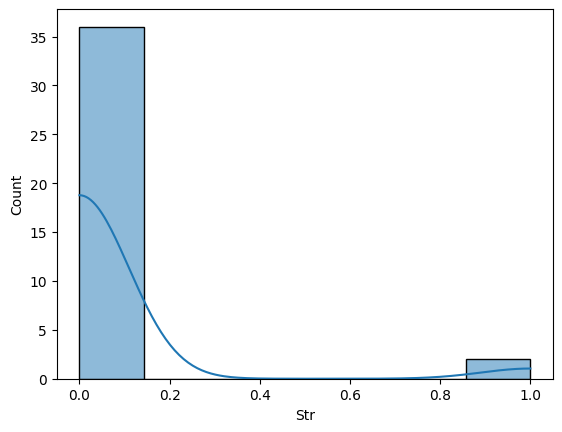

-----------------------------------
Признак: A_C
тест Шапиро-Уилк: Statistics=0.621, p-value=0.000
Отклонить гипотезу о нормальности


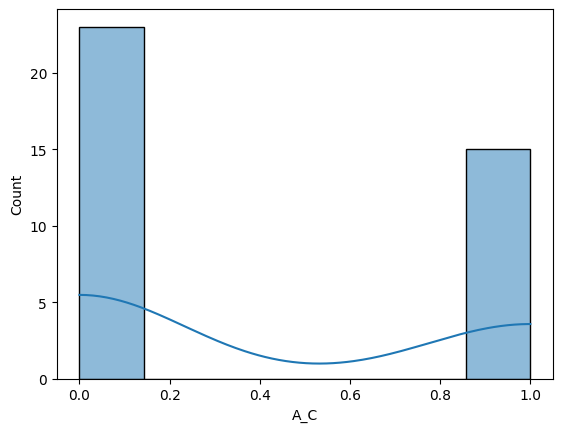

-----------------------------------
Признак: A_H
тест Шапиро-Уилк: Statistics=0.628, p-value=0.000
Отклонить гипотезу о нормальности


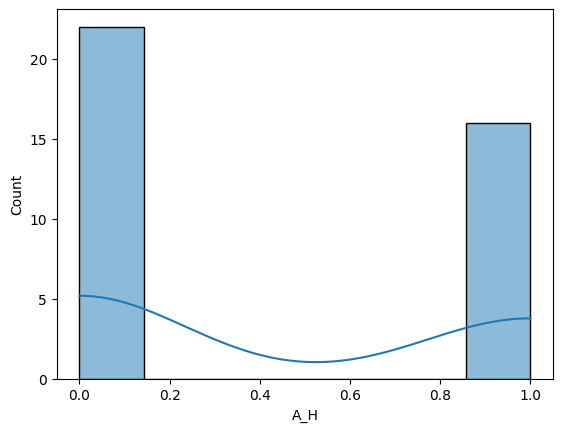

-----------------------------------
Признак: A_D
тест Шапиро-Уилк: Statistics=0.473, p-value=0.000
Отклонить гипотезу о нормальности


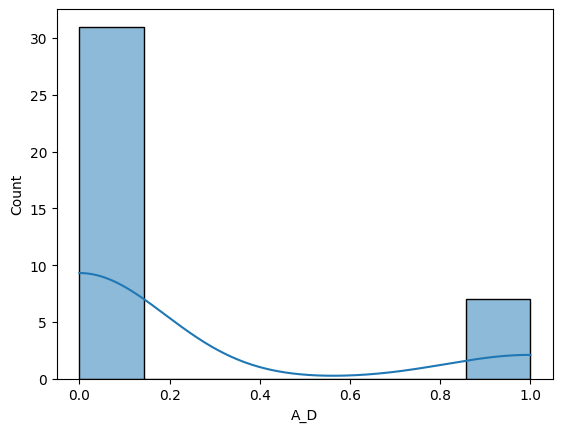

-----------------------------------
Признак: Choi
тест Шапиро-Уилк: Statistics=0.969, p-value=0.376
Принять гипотезу о нормальности
-----------------------------------
Признак: Tgi
тест Шапиро-Уилк: Statistics=0.873, p-value=0.000
Отклонить гипотезу о нормальности


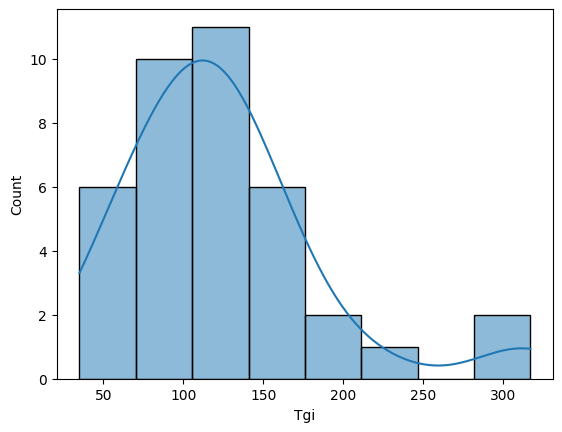

-----------------------------------
Признак: HDLi
тест Шапиро-Уилк: Statistics=0.933, p-value=0.026
Отклонить гипотезу о нормальности


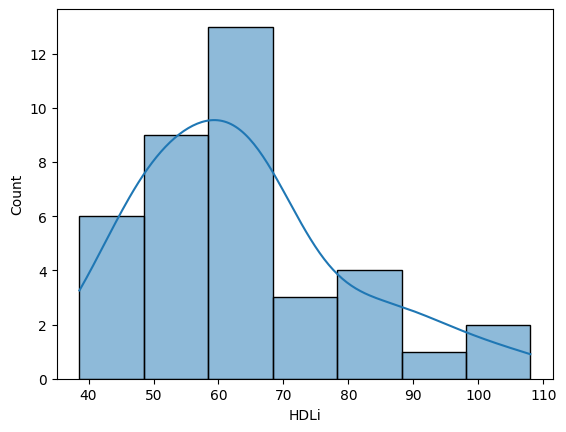

-----------------------------------
Признак: LDLi
тест Шапиро-Уилк: Statistics=0.958, p-value=0.169
Принять гипотезу о нормальности
-----------------------------------
Признак: Choi_exp
тест Шапиро-Уилк: Statistics=0.969, p-value=0.376
Принять гипотезу о нормальности
-----------------------------------
Признак: Tgi_exp
тест Шапиро-Уилк: Statistics=0.873, p-value=0.000
Отклонить гипотезу о нормальности


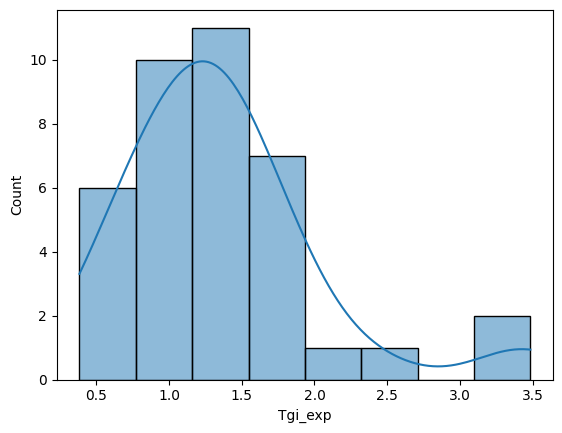

-----------------------------------
Признак: HDLi_exp
тест Шапиро-Уилк: Statistics=0.933, p-value=0.026
Отклонить гипотезу о нормальности


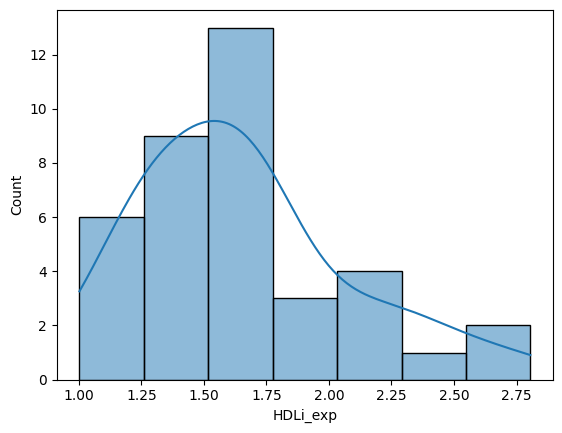

-----------------------------------
Признак: LDLi_exp
тест Шапиро-Уилк: Statistics=0.958, p-value=0.169
Принять гипотезу о нормальности
-----------------------------------
Признак: AI
тест Шапиро-Уилк: Statistics=0.978, p-value=0.658
Принять гипотезу о нормальности
-----------------------------------
Признак: rlatmin
тест Шапиро-Уилк: Statistics=0.959, p-value=0.173
Принять гипотезу о нормальности
-----------------------------------
Признак: rantmin
тест Шапиро-Уилк: Statistics=0.945, p-value=0.059
Принять гипотезу о нормальности
-----------------------------------
Признак: rposmin
тест Шапиро-Уилк: Statistics=0.975, p-value=0.528
Принять гипотезу о нормальности
-----------------------------------
Признак: llatmin
тест Шапиро-Уилк: Statistics=0.916, p-value=0.008
Отклонить гипотезу о нормальности


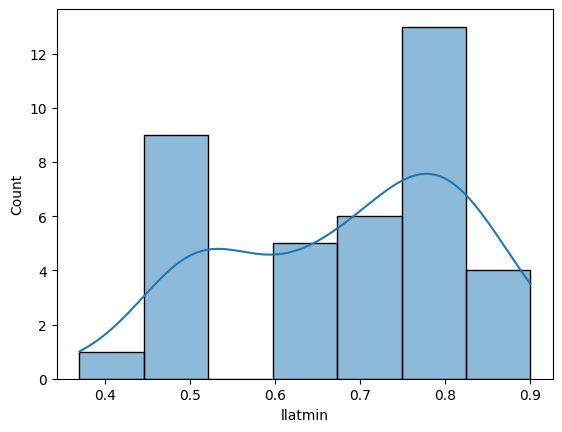

-----------------------------------
Признак: lantmin
тест Шапиро-Уилк: Statistics=0.948, p-value=0.075
Принять гипотезу о нормальности
-----------------------------------
Признак: lposmin
тест Шапиро-Уилк: Statistics=0.969, p-value=0.376
Принять гипотезу о нормальности
-----------------------------------
Признак: rlatmax
тест Шапиро-Уилк: Statistics=0.978, p-value=0.642
Принять гипотезу о нормальности
-----------------------------------
Признак: rantmax
тест Шапиро-Уилк: Statistics=0.974, p-value=0.513
Принять гипотезу о нормальности
-----------------------------------
Признак: rposmax
тест Шапиро-Уилк: Statistics=0.972, p-value=0.450
Принять гипотезу о нормальности
-----------------------------------
Признак: llatmax
тест Шапиро-Уилк: Statistics=0.955, p-value=0.132
Принять гипотезу о нормальности
-----------------------------------
Признак: lantmax
тест Шапиро-Уилк: Statistics=0.963, p-value=0.230
Принять гипотезу о нормальности
-----------------------------------
Признак: lposmax
те

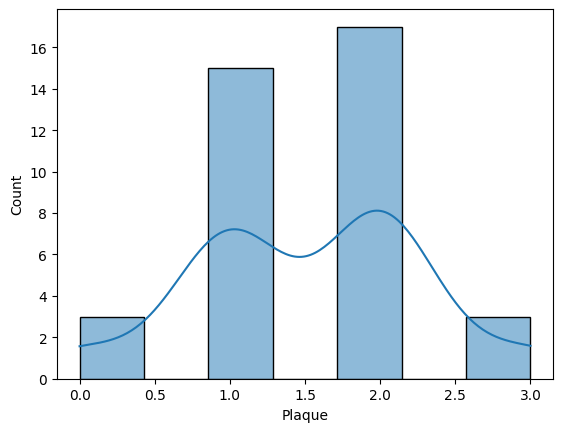

-----------------------------------
Признак: Statins
тест Шапиро-Уилк: Statistics=nan, p-value=nan
Отклонить гипотезу о нормальности


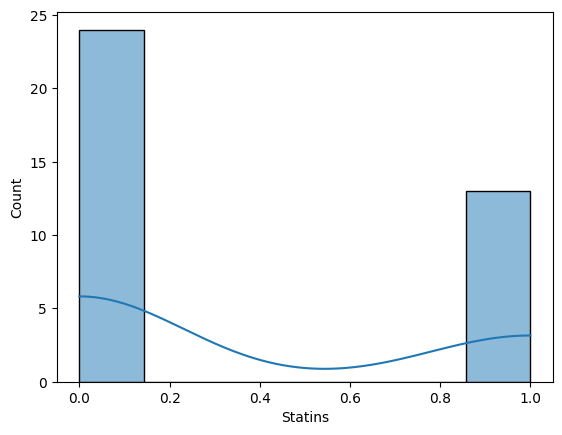

In [24]:
stat_columns(data_metadata)

In [25]:
columns_not_norm

['Wt',
 'Sucrose',
 'Group',
 'Plasmavolume',
 'Wt',
 'BMI',
 'Sys',
 'Sm',
 'Dm',
 'HT',
 'LVH',
 'IHD',
 'MI',
 'Str',
 'A_C',
 'A_H',
 'A_D',
 'Tgi',
 'HDLi',
 'Tgi_exp',
 'HDLi_exp',
 'llatmin',
 'Plaque',
 'Statins']

# вывод
* columns_not_norm распределения не нормальной формы (использовался тест Шапиро-Уилк)
* имеются распередения скошенные вправо и влево
* присутствуют также распределения Бернули и Биноминальное.

# 3.
    # Гипотез для 2 групп.
    * группа LDL(low density lipids) и HDL (high density lipids)
    * сравнивался показатель carotidIMTmean(Каротидный интима-медиа (КИМ))
        H0 гипотиза m(LDL) = m(HDK)
        H1 гипотиза m(LDL) != m(HDK)

In [26]:
normal_distribution(data_metadata['carotidIMTmean'])

тест Шапиро-Уилк: Statistics=0.975, p-value=0.549
Принять гипотезу о нормальности


In [27]:
data_for_group = data_metadata[['Patientnumber','carotidIMTmean']]
data_for_group

,Patientnumber,carotidIMTmean
0,50,0.642500
1,51,0.840000
2,52,0.850000
3,53,0.824167
4,54,1.098333
5,55,0.847500
6,56,0.672500
7,57,0.785000
8,58,0.849167
9,59,0.704167


In [28]:
group_1 = data_high_density_lipids[['Patient.number','Name']]
group_1

,Patient.number,Name
0,50,HDL
1,52,HDL
2,53,HDL
3,54,HDL
4,55,HDL
5,56,HDL
6,57,HDL
7,58,HDL
8,59,HDL
9,60,HDL


In [29]:
group_HDL = group_1.merge(data_for_group, left_on='Patient.number', right_on='Patientnumber')
group_HDL

,Patient.number,Name,Patientnumber,carotidIMTmean
0,50,HDL,50,0.642500
1,52,HDL,52,0.850000
2,53,HDL,53,0.824167
3,54,HDL,54,1.098333
4,55,HDL,55,0.847500
5,56,HDL,56,0.672500
6,57,HDL,57,0.785000
7,58,HDL,58,0.849167
8,59,HDL,59,0.704167
9,60,HDL,60,0.745833


In [30]:
group_2 = data_low_density_lipids[['Patient.number','Name']]
group_2

,Patient.number,Name
0,50,LDL
1,52,LDL
2,53,LDL
3,54,LDL
4,55,LDL
5,56,LDL
6,57,LDL
7,58,LDL
8,59,LDL
9,60,LDL


In [31]:
group_LDL = group_2.merge(data_for_group, left_on='Patient.number', right_on='Patientnumber')
group_LDL

,Patient.number,Name,Patientnumber,carotidIMTmean
0,50,LDL,50,0.642500
1,52,LDL,52,0.850000
2,53,LDL,53,0.824167
3,54,LDL,54,1.098333
4,55,LDL,55,0.847500
5,56,LDL,56,0.672500
6,57,LDL,57,0.785000
7,58,LDL,58,0.849167
8,59,LDL,59,0.704167
9,60,LDL,60,0.745833


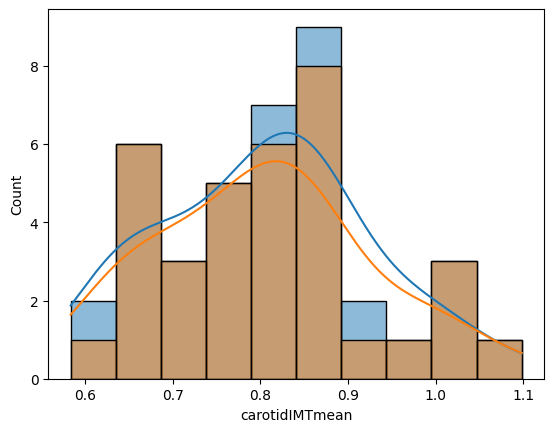

In [32]:
sns.histplot(data=group_LDL['carotidIMTmean'],kde=True, bins=10)
sns.histplot(data=group_HDL['carotidIMTmean'],kde=True, bins=10)
plt.show();

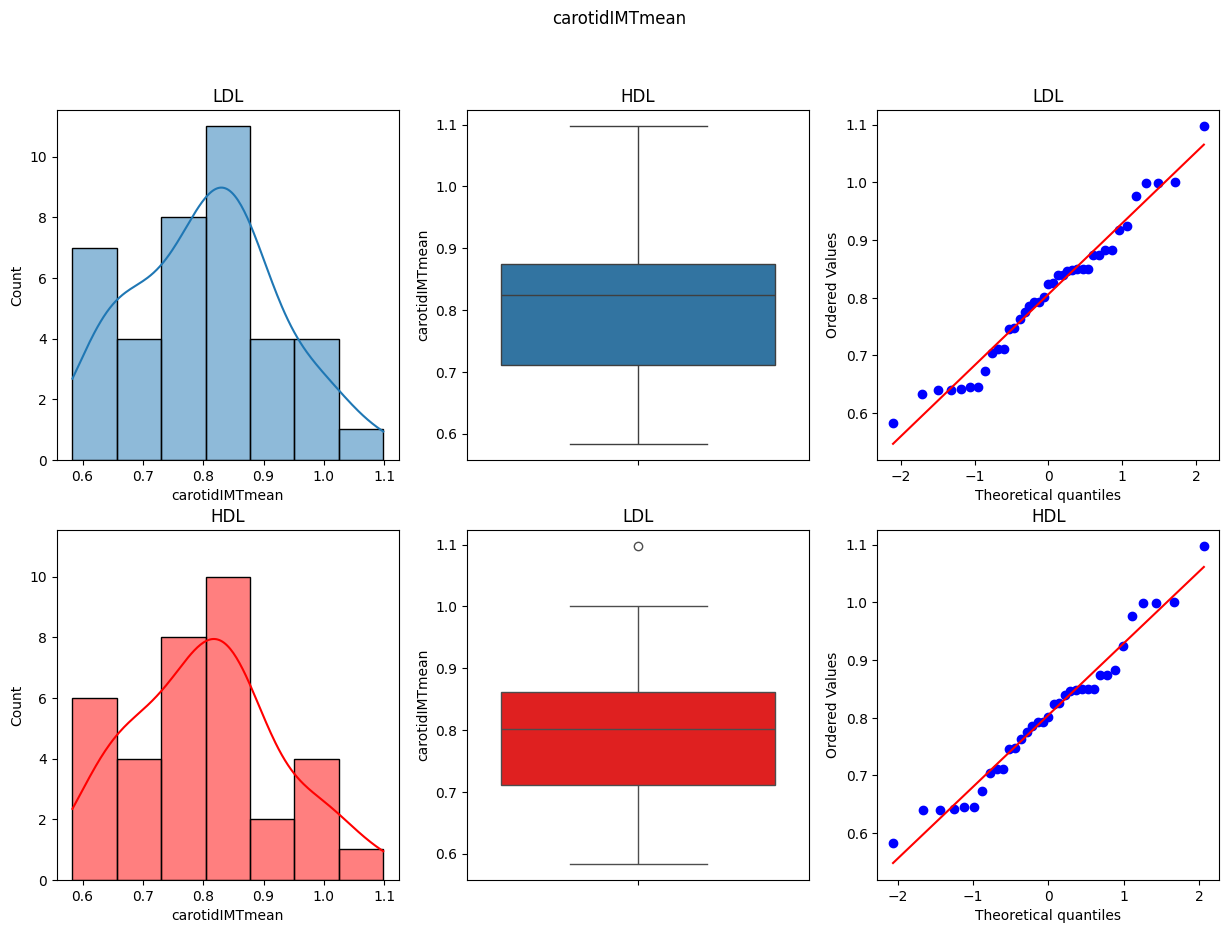

In [33]:
fig, axes = plt.subplots(2,3,figsize=(15,10), sharey='col')  
sns.histplot(data=group_LDL['carotidIMTmean'],ax=axes[0,0],kde=True, )
sns.histplot(data=group_HDL['carotidIMTmean'],ax=axes[1,0],kde=True, color='red')
sns.boxplot(data=group_LDL['carotidIMTmean'],ax=axes[0,1])
sns.boxplot(data=group_HDL['carotidIMTmean'],ax=axes[1,1], color='red')
st.probplot(group_LDL['carotidIMTmean'],plot=axes[0,2])
st.probplot(group_HDL['carotidIMTmean'],plot=axes[1,2])
axes[0,0].set_title('LDL')
axes[0,1].set_title('HDL')
axes[0,2].set_title('LDL')
axes[1,0].set_title('HDL')
axes[1,1].set_title('LDL')
axes[1,2].set_title('HDL')
fig.suptitle('carotidIMTmean')
plt.show();

In [34]:
alpha = 0.05 

results = st.ttest_ind(group_LDL['carotidIMTmean'], group_HDL['carotidIMTmean'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9626621920760154
Не получилось отвергнуть нулевую гипотезу


# Гипотеза для 2 групп.
    * группа LDL(low density lipids) и HDL (high density lipids)
    * сравнивался показатель carotidIMTmean(Каротидный интима-медиа (КИМ))
        H0 гипотиза m(LDL) = m(HDK)
        H1 гипотиза m(LDL) != m(HDK)

    * p-значение: 0.9626621920760154
    * Не получилось отвергнуть нулевую гипотезу

# Тесты для 3 и более групп сравнения, post-hoc тестирование

In [35]:
data_metadata.columns

Index(['Vialnumber', 'Patientnumber', 'Sucrose', 'Name', 'Group', 'Date',
       'Age', 'Plasmavolume', 'Ht', 'Wt', 'BMI', 'Sys', 'Dia', 'PR', 'Sm',
       'Dm', 'HT', 'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'Choi',
       'Tgi', 'HDLi', 'LDLi', 'Choi_exp', 'Tgi_exp', 'HDLi_exp', 'LDLi_exp',
       'AI', 'rlatmin', 'rantmin', 'rposmin', 'llatmin', 'lantmin', 'lposmin',
       'rlatmax', 'rantmax', 'rposmax', 'llatmax', 'lantmax', 'lposmax',
       'carotidIMTmean', 'Plaque', 'Statins', 'comorbidities'],
      dtype='object')

In [42]:
data_for_3_group = data_metadata[['BMI', 'carotidIMTmean']]

In [45]:
data_for_3_group['BMI'].min()

np.float64(20.281233098972415)

In [46]:
data_for_3_group['BMI'].max()

np.float64(38.8660265203475)

In [51]:
data_for_3_group['BMI_group'] = pd.cut(data_for_3_group['BMI'], 3, labels=[1, 2, 3])

/tmp/ipykernel_50438/3773030733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_3_group['BMI_group'] = pd.cut(data_for_3_group['BMI'], 3, labels=[1, 2, 3])


In [52]:
data_for_3_group

,BMI,carotidIMTmean,BMI_group
0,31.615793,0.642500,2
1,34.643114,0.840000,3
2,29.744200,0.850000,2
3,22.968750,0.824167,1
4,21.913580,1.098333,1
5,25.000000,0.847500,1
6,24.910767,0.672500,1
7,23.243408,0.785000,1
8,35.111111,0.849167,3
9,29.813413,0.704167,2


In [54]:
data_for_3_group['BMI_group'].value_counts()

BMI_group
1    16
2    14
3     8
Name: count, dtype: int64

In [59]:
data_for_3_group[data_for_3_group['BMI_group']==1]['carotidIMTmean']

3     0.824167
4     1.098333
5     0.847500
6     0.672500
7     0.785000
10    0.745833
14    0.976667
15    0.874167
18    0.825833
22    0.890833
23    1.000833
25    0.583333
26    0.912500
27    0.850000
30    0.640833
34    0.594167
Name: carotidIMTmean, dtype: float64

In [55]:
from scipy.stats import f_oneway

In [71]:
group_bmi_1 = data_for_3_group[data_for_3_group['BMI_group']==1]['carotidIMTmean'].values
group_bmi_2 = data_for_3_group[data_for_3_group['BMI_group']==2]['carotidIMTmean'].values
group_bmi_3 = data_for_3_group[data_for_3_group['BMI_group']==3]['carotidIMTmean'].values


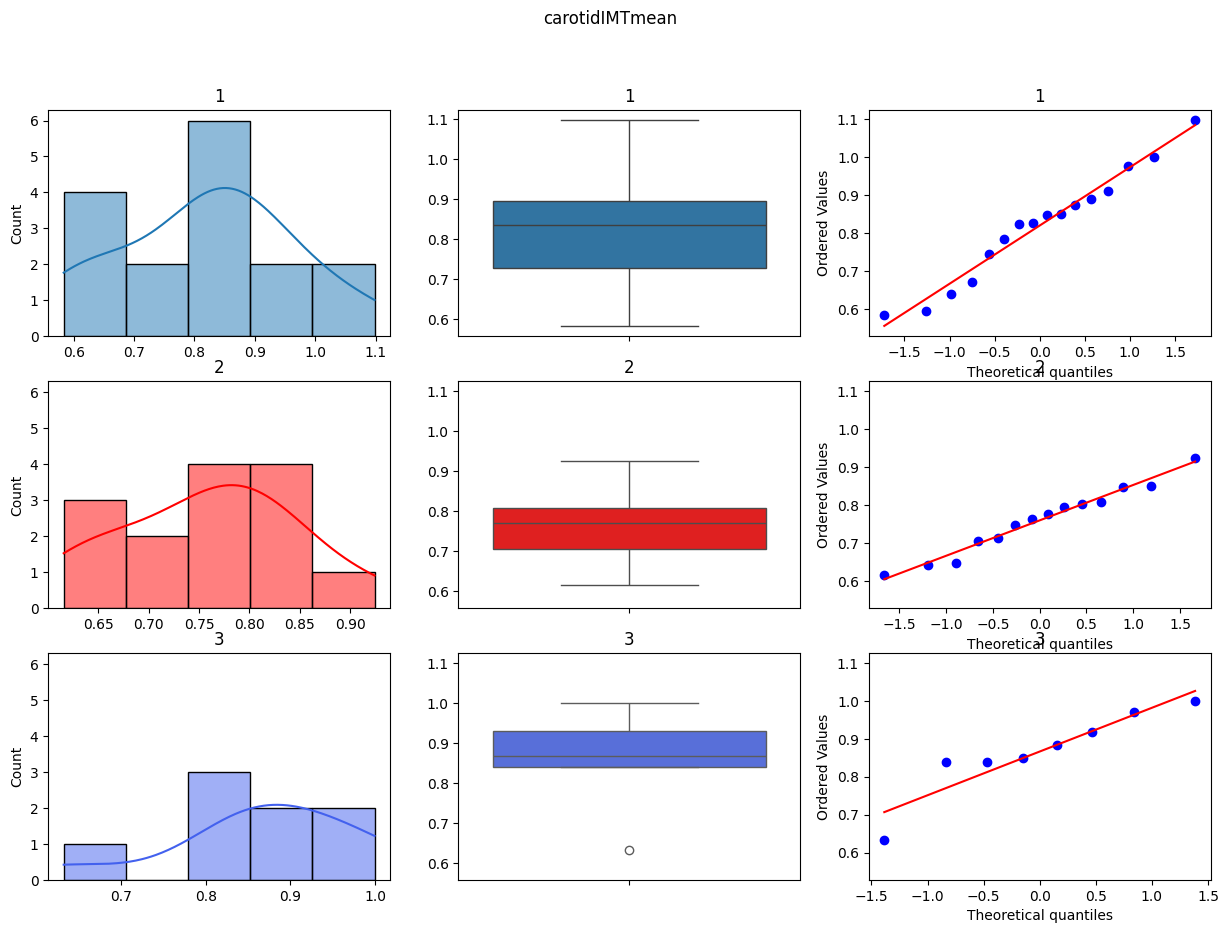

In [101]:
fig, axes = plt.subplots(3,3,figsize=(15,10), sharey='col')  
sns.histplot(data=group_bmi_1,ax=axes[0,0],kde=True, )
sns.histplot(data=group_bmi_2,ax=axes[1,0],kde=True, color='red')
sns.histplot(data=group_bmi_3,ax=axes[2,0],kde=True, color='#4361EE')

sns.boxplot(data=group_bmi_1,ax=axes[0,1])
sns.boxplot(data=group_bmi_2,ax=axes[1,1], color='red')
sns.boxplot(data=group_bmi_3,ax=axes[2,1], color='#4361EE')

st.probplot(group_bmi_1,plot=axes[0,2])
st.probplot(group_bmi_2,plot=axes[1,2])
st.probplot(group_bmi_3,plot=axes[2,2])

axes[0,0].set_title('1')
axes[0,1].set_title('1')
axes[0,2].set_title('1')
axes[1,0].set_title('2')
axes[1,1].set_title('2')
axes[1,2].set_title('2')
axes[2,0].set_title('3')
axes[2,1].set_title('3')
axes[2,2].set_title('3')
fig.suptitle('carotidIMTmean')
plt.show();

In [107]:
group_bmi_1.mean()

np.float64(0.82015625)

In [108]:
group_bmi_2.mean()

np.float64(0.7593452380952381)

In [109]:
group_bmi_3.mean()

np.float64(0.8663541666666666)

In [72]:
normal_distribution(data_for_3_group['carotidIMTmean'])

тест Шапиро-Уилк: Statistics=0.975, p-value=0.549
Принять гипотезу о нормальности


# Гипотеза для 3 групп.
    * сравнивался показатель carotidIMTmean(Каротидный интима-медиа (КИМ)) в трех группах (BMI(20.2-25), (26.8-31.61), (34.33-38.86))
        H0 гипотиза m(1) = m(2) = m(3) 
        H1 гипотиза m(1) != m(2) != m(3)

In [88]:
f_oneway(group_bmi_1, group_bmi_2, group_bmi_3)

F_onewayResult(statistic=np.float64(2.154041449287991), pvalue=np.float64(0.13114694206466013))

In [89]:
alpha = 0.05 

results = f_oneway(group_bmi_1, group_bmi_2, group_bmi_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.13114694206466013
Не получилось отвергнуть нулевую гипотезу


In [116]:
from scipy import stats
results = stats.kruskal(group_bmi_1, group_bmi_2, group_bmi_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.08668641604482001
Не получилось отвергнуть нулевую гипотезу


# пример дальнейшей работы при условии что была отвергнута нулевая гипотиза.

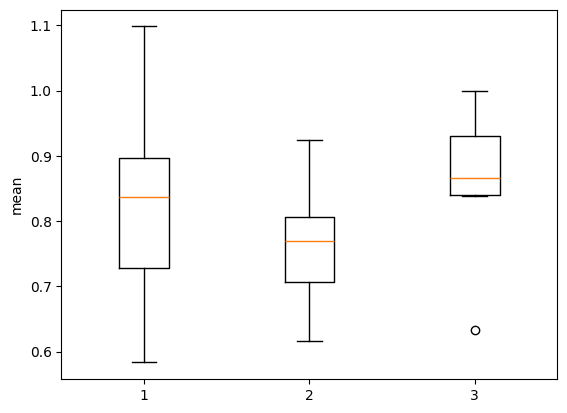

In [119]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([group_bmi_1, group_bmi_2, group_bmi_3])
ax.set_xticklabels(["1", "2", "3"]) 
ax.set_ylabel("mean") 
plt.show()

In [117]:
from scipy.stats import tukey_hsd
res = tukey_hsd(group_bmi_1, group_bmi_2, group_bmi_3)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.061     0.364    -0.047     0.169
 (0 - 2)     -0.046     0.654    -0.174     0.082
 (1 - 0)     -0.061     0.364    -0.169     0.047
 (1 - 2)     -0.107     0.127    -0.238     0.024
 (2 - 0)      0.046     0.654    -0.082     0.174
 (2 - 1)      0.107     0.127    -0.024     0.238



# вывод:
### Гипотеза для 3 групп.
* сравнивался показатель carotidIMTmean(Каротидный интима-медиа (КИМ)) в трех группах (BMI(20.2-25), (26.8-31.61), (34.33-38.86))
            H0 гипотиза m(1) = m(2) = m(3) 
            H1 гипотиза m(1) != m(2) != m(3)

        тест Шапиро-Уилк: Statistics=0.975, p-value=0.549
        Принять гипотезу о нормальности

        ANOVA
        p-значение: 0.13114694206466013
        Не получилось отвергнуть нулевую гипотезу

        Kruskal-Wallis
        p-значение: 0.08668641604482001
        Не получилось отвергнуть нулевую гипотезу